# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight

# Loading the data

In [4]:
traindata = pd.read_csv(r"C:\Users\vivek\Desktop\sldata\sign_mnist_train.csv")
testdata = pd.read_csv(r"C:\Users\vivek\Desktop\sldata\sign_mnist_test.csv")

# Preprocessing the data

In [5]:
traindata.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
#dimension of traindata
traindata.shape

(27455, 785)

In [7]:
#dimension of testdata
testdata.shape

(7172, 785)

In [8]:
X_train = traindata.drop('label', axis = 1)
X_test = testdata.drop('label', axis = 1)

In [9]:
X_train = X_train.values
X_test = X_test.values

In [11]:
y_train = traindata['label'].values
y_test = testdata['label'].values

In [15]:
#Reshaping data for appropriate input by CNN's by converting from 1-D to 3-D
X_train = X_train.reshape(-1, 28, 28, 1)

In [16]:
X_test = X_test.reshape(-1, 28, 28, 1)

In [17]:
X_train.shape

(27455, 28, 28, 1)

In [18]:
from sklearn.preprocessing import LabelBinarizer

In [19]:
#Converting the integer labels into a binary format
lab = LabelBinarizer()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

In [23]:
#Augmenting the dataset to generate more data for the model to train on. Also, normalisation of data is done here
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 10,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1, 
                                  zoom_range = 0.1,
                                  horizontal_flip = True)

In [24]:
#Normalisation of test data by dividing each pixel by 255
X_test = X_test/255

In [28]:
train_datagen.fit(X_train)

# Preparing the CNN model

In [31]:
#CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(24, activation = "softmax")
])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [34]:
#Training
#Using desired optimizer, loss function and metrics
model.compile(optimizer = 'Adam', loss = tf.keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [35]:
#Fitting the model with the training set and testing set
history = model.fit(train_datagen.flow(X_train, y_train, batch_size = 128), epochs = 25, validation_data = (X_test, y_test))

  ...
    to  
  ['...']
Train for 215 steps, validate on 7172 samples
Epoch 1/25
215/215 [==============================] - 29s 135ms/step - loss: 1.8620 - accuracy: 0.4071 - val_loss: 5.0242 - val_accuracy: 0.1005
Epoch 2/25
215/215 [==============================] - 33s 152ms/step - loss: 0.7612 - accuracy: 0.7396 - val_loss: 2.7095 - val_accuracy: 0.3250
Epoch 3/25
215/215 [==============================] - 31s 145ms/step - loss: 0.4663 - accuracy: 0.8391 - val_loss: 0.7131 - val_accuracy: 0.7414
Epoch 4/25
215/215 [==============================] - 32s 148ms/step - loss: 0.3450 - accuracy: 0.8823 - val_loss: 0.1161 - val_accuracy: 0.9651
Epoch 5/25
215/215 [==============================] - 31s 146ms/step - loss: 0.2694 - accuracy: 0.9068 - val_loss: 0.1471 - val_accuracy: 0.9497
Epoch 6/25
215/215 [==============================] - 31s 145ms/step - loss: 0.2208 - accuracy: 0.9227 - val_loss: 0.5555 - val_accuracy: 0.8119
Epoch 7/25
215/215 [==============================] - 32s 1

# Analysing the model

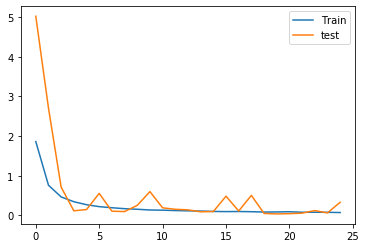

In [36]:
fig = plt.figure()
plt.plot(history.epoch,  history.history['loss'] ,label='Train')
plt.plot(history.epoch,  history.history['val_loss'] ,label='test')
plt.legend()
plt.show()

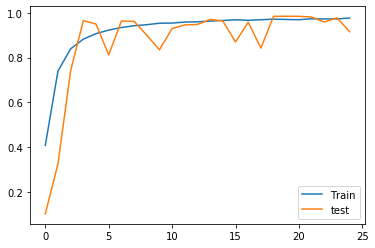

In [39]:
fig = plt.figure()
plt.plot(history.epoch,  history.history['accuracy'] ,label='Train')
plt.plot(history.epoch,  history.history['val_accuracy'] ,label='test')
plt.legend()
plt.show()

# Saving the model

In [40]:
model.save('slmod1.h5')